# Data Cleaning

**Data cleaning** is one most crucial but time-intensive steps in the data science pipeline. In 2014, the New York Times published an [article](https://www.nytimes.com/2014/08/18/technology/for-big-data-scientists-hurdle-to-insights-is-janitor-work.html?_r=0) which estimated that: 

> Data scientists spend 80% of their time cleaning, preparing, and organizing data. 

With improvements in the way we collect data, this percentage of time is probably slightly lower now than when the article was first published. But, data cleaning is still a very important process that needs to be taken care of before proceeding to data analysis. 

<img width="40%" src="https://practicalpython.s3.us-east-2.amazonaws.com/assets/data_cleaning_comic.png"/>

Without cleaning our data, the results that we generate from it could be misleading. With garbage data, your results will also be garbage regardless of how much time you spend creating your model and fine-tuning it. 

So, let's get start with the longest but also most important chapter of this book: **data cleaning** 🧹🗑️. 

## 1) Cleaning our column names

When we first loaded in our NYC real estate dataset, one of the first things that I noticed was the column names. Let's take a look again:

In [1]:
import pandas as pd 

df = pd.read_csv("data/nyc_real_estate.csv")
df.sample()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
37371,3,FLATBUSH-CENTRAL,02 TWO FAMILY DWELLINGS,1,5229,74,,B1,1295 ROGERS AVENUE,,...,2,0,2,4429,1523,1899,1,B1,0,2017-01-05 00:00:00


The column names are all uppercase and have spaces between words. This is not an ideal format for our analysis because we'll be calling these column names often and it's annoying to worry about capitlization and spacing. My ideal format for column names are:

1. lowercase 
2. [snakecase](https://en.wikipedia.org/wiki/Snake_case) (when spaces are replaced with `_` underscores)

Let's look at one of the columns from our dataset as an example. The column name is current formatted like this:

**`BUILDING CLASS CATEGORY`** 🤮 

The ideal format would look something like this: 

**`building_class_category`** 😇

In order to make this change, we can write a function that does this transformation for us. Let's start with our example of BUILDING CLASS CATEGORY.

In [2]:
original = 'BUILDING CLASS CATEGORY'

The first thing we want to do is make the name all lowercase. We can use Python built-in [`lower()`](https://www.programiz.com/python-programming/methods/string/lower) function to do this:

In [3]:
original.lower()

'building class category'

Great! The next thing we need to do is replace spaces with underscores:

In [4]:
original.lower().replace(' ', '_')

'building_class_category'

We can now create a function out of this:

In [5]:
def clean_column_name(column):
    return column.lower().replace(' ', '_')

clean_column_name(original)

'building_class_category'

To apply this to ALL columns, we'll need to loop over each column name and apply our `clean_column_name()` function to it. Let's create a dictionary, `column_dict`, that maps our original column name to our new column name: 


```
{ original_column_name : new_column_name }
```

In [6]:
column_dict = dict()

for c in df.columns:
    column_dict[c] = clean_column_name(c)

column_dict

{'BOROUGH': 'borough',
 'NEIGHBORHOOD': 'neighborhood',
 'BUILDING CLASS CATEGORY': 'building_class_category',
 'TAX CLASS AT PRESENT': 'tax_class_at_present',
 'BLOCK': 'block',
 'LOT': 'lot',
 'EASE-MENT': 'ease-ment',
 'BUILDING CLASS AT PRESENT': 'building_class_at_present',
 'ADDRESS': 'address',
 'APARTMENT NUMBER': 'apartment_number',
 'ZIP CODE': 'zip_code',
 'RESIDENTIAL UNITS': 'residential_units',
 'COMMERCIAL UNITS': 'commercial_units',
 'TOTAL UNITS': 'total_units',
 'LAND SQUARE FEET': 'land_square_feet',
 'GROSS SQUARE FEET': 'gross_square_feet',
 'YEAR BUILT': 'year_built',
 'TAX CLASS AT TIME OF SALE': 'tax_class_at_time_of_sale',
 'BUILDING CLASS AT TIME OF SALE': 'building_class_at_time_of_sale',
 'SALE PRICE': 'sale_price',
 'SALE DATE': 'sale_date'}

Great! We can now overwrite original column names with the new column names using pandas' [`rename()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html) function. 

In [7]:
df = df.rename(columns=column_dict)
df.sample()

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apartment_number,...,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date
47339,3,SUNSET PARK,09 COOPS - WALKUP APARTMENTS,2,750,5,,C6,"712 45TH STREET, 2D",,...,0,0,0,0,0,1924,2,C6,395000,2016-09-27 00:00:00


Columns look great now! 🎉

<img width="40%" src="https://media.giphy.com/media/3otPom0tSP4zgfrakE/giphy.gif"/>

## 2) Dropping columns 

Our dataset has 21 columns but we won't be using all of them for our analysis. For example, for this specific exploration, we don't care so much about the following columns: 

- ease-ment 
- lot 
- block 
- tax_class_at_time_of_sale
- tax_class_at_present

We can remove these columns from our dataframe using the [`.drop()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html) function. With `.drop()`, you can choose to drop columns by specifying its index (numeric location in the datafarme) or column name. It's often easier to explicitly remove specific columns by name so let's do that. First, we need to create a list of the columns we want to remove: 

In [8]:
columns_to_remove = ['ease-ment', 'lot', 'block', 'tax_class_at_present', 'tax_class_at_time_of_sale']

Now, we can drop these columns using the `.drop()` function:

In [9]:
df = df.drop(columns=columns_to_remove)

```{important}
We're overwritting our dataframe with a new version that removes the 5 columns we don't need. If we try re-running this code, after having removed the columns, we'll get an error message that says: 
> KeyError: "['ease-ment' 'lot' 'block' 'tax_class_at_present'\n 'tax_class_at_time_of_sale'] not found in axis"
Make sure that you only drop a column once. Trying to drop a column that doesn't exist in yoru dataframe will cause your code to break. 
```

Let's see how many columns are in our dataset now:

In [10]:
df.shape

(84548, 16)

Awesome! Our dataframe went from 21 columns to 16 columns, which makes sense because we just removed 5 columns that we don't need.

## 3) Fixing column datatypes

When we first load in a dataframe, it's very possible that column datatypes don't get loaded in correctly. For example, numerical columns get loaded in as "object" datatypes instead of integer/float. Datetime columns also get loaded in as a string (object) datatype by default so it's our responsibility to cast our column datatypes into their appropriate formats.

Before we start fixing our datatype, let's quickly review what the possible datatypes are. You can also check out the pandas [datatype documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#basics-dtypes) for more information. 
- `int64`: Whole number integer datatypes
- `float64`: Floating number (fractional number, with decimal) datatypes
- `bool`: True or False boolean datatypes 
- `object`: A "catch-all" datatype that usually represents a string datatype or contains a mix of more than one datatype (e.g., string + integer)


Let's get a glimpse of our dataframe's datatypes:

In [11]:
df.dtypes

borough                            int64
neighborhood                      object
building_class_category           object
building_class_at_present         object
address                           object
apartment_number                  object
zip_code                           int64
residential_units                  int64
commercial_units                   int64
total_units                        int64
land_square_feet                  object
gross_square_feet                 object
year_built                         int64
building_class_at_time_of_sale    object
sale_price                        object
sale_date                         object
dtype: object

There are several columns that are listed as "object" that I think could be integers or floats instead:

- `land_square_feet`
- `gross_square_feet`
- `sale_price`

To convert an object column into a float column, we can try the brute-force approach of `astype()`:

```
df['sale_price'].astype(float)
```

If you try this, you'll see that an error gets thrown:

```
ValueError: could not convert string to float: ' -  '
```

This indicates that there are some values in this `sale_price` column that cannot be convert to float. We'll have to handle these first before proceeding. Let's use the Pandas Series `.replace()` function to replace `' -  '` with `None` (to indicate a missing value).

❗**String vs. Pandas `replace()` function**

The string `replace()` function looks like this:

```
replace(current_value, new_value)
```

The syntax for Pandas `.replace()` is a bit different since it uses a dictionary instead:

```
replace({current_value: new_value})
```

Let's try it out on our dataset:

In [12]:
df['sale_price'] = df['sale_price'].replace({' -  ': None})
df['sale_price'] = df['sale_price'].astype(float)
df['sale_price'].dtype

dtype('float64')

After removing that weird hyphen string from our `sale_price` column, we were able to successfully cast our column to a float datatype. 🥳

We can apply the same approach to the `land_square_feet` and `gross_square_feet` columns.

In [13]:
df['land_square_feet'] = df['land_square_feet'].replace({' -  ': None}).astype(float)
df['gross_square_feet'] = df['gross_square_feet'].replace({' -  ': None}).astype(float)

Now, the last column that we should fix is the `sale_date` column. It's default datatype is "object" but we can convert this to a datetime datatype using pandas' [`to_datetime()`](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) function

In [14]:
df['sale_date'] = pd.to_datetime(df['sale_date'])
df['sale_date'].dtype

dtype('<M8[ns]')

After applying `to_datetime()`, we can see that the `sale_date` column's datatype is now `'<M8[ns]'` which is a datetime datatype. 

## 4) Handling Missing Values

Remember in Chapter 2 when we thought that our data didn't have any missing values? This is no longer the case after cleaning our data. We know that the following columns have missing values:

- sale_price
- land_square_feet
- gross_square_feet

Let's re-assess how many missing values we're dealing with.

<img src="https://media.giphy.com/media/NS7gPxeumewkWDOIxi/giphy.gif"/>

How many missing values are we dealing with for each column in our dataframe?

In [15]:
df.isnull().sum()

borough                               0
neighborhood                          0
building_class_category               0
building_class_at_present             0
address                               0
apartment_number                      0
zip_code                              0
residential_units                     0
commercial_units                      0
total_units                           0
land_square_feet                  26252
gross_square_feet                 27612
year_built                            0
building_class_at_time_of_sale        0
sale_price                        14561
sale_date                             0
dtype: int64

Wow! We can see that there are more missing values for the square footage columns as comopared to the sale price column. Let's check out what percentage of values are missing for each column. We can do this by simply dividing the missing value count for each column by the total number of rows in our dataframe:

In [16]:
df.isnull().sum() / len(df)

borough                           0.000000
neighborhood                      0.000000
building_class_category           0.000000
building_class_at_present         0.000000
address                           0.000000
apartment_number                  0.000000
zip_code                          0.000000
residential_units                 0.000000
commercial_units                  0.000000
total_units                       0.000000
land_square_feet                  0.310498
gross_square_feet                 0.326584
year_built                        0.000000
building_class_at_time_of_sale    0.000000
sale_price                        0.172222
sale_date                         0.000000
dtype: float64

Over 30% of properties don't have square footage data, while 17% of properties don't have sale price. 

An interesting thing to know is which rows have missing values. Ideally, the missing values are occuring in the same properties:

<AxesSubplot:>

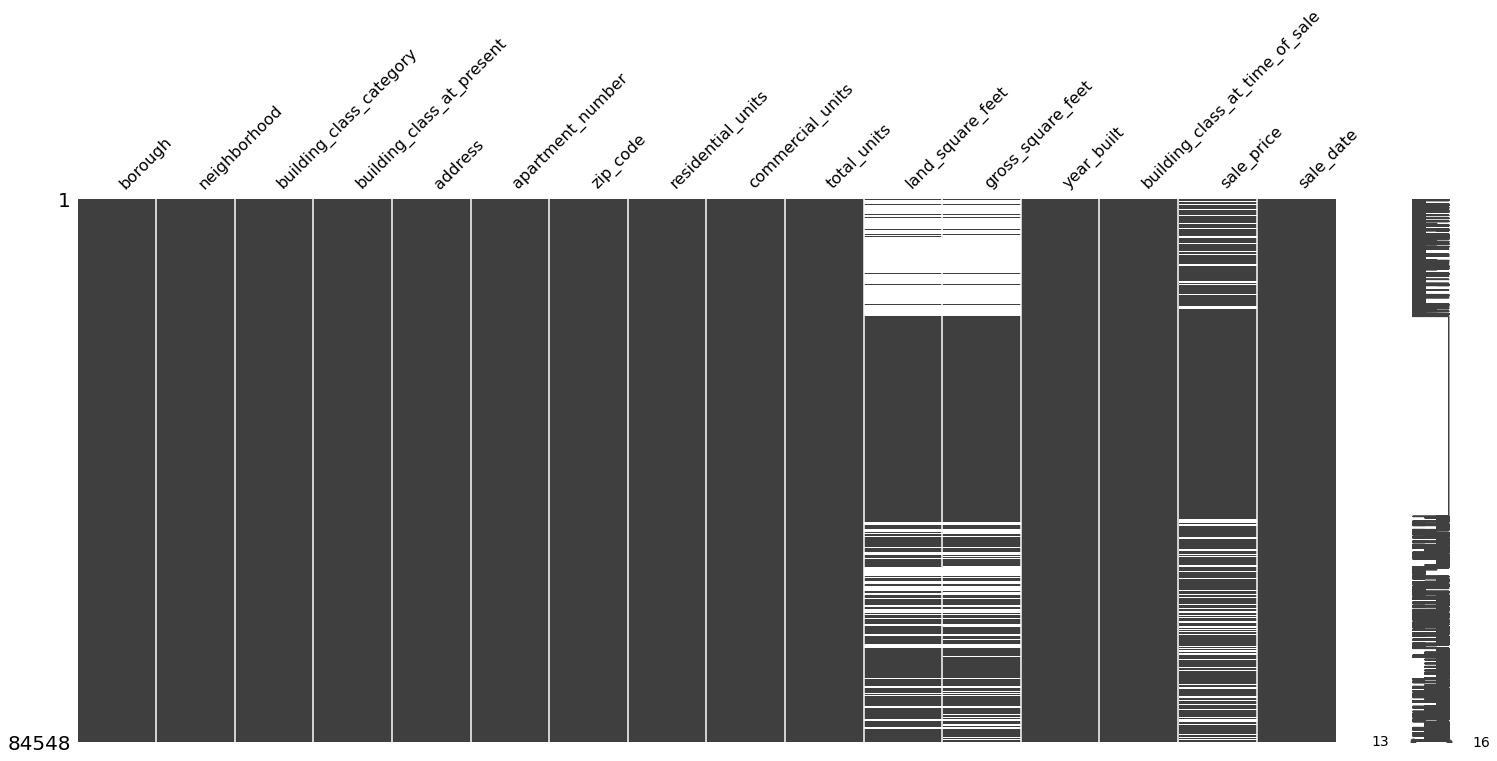

In [17]:
import missingno as msno

msno.matrix(df)

The missing value matrix shows that missing values across the 3 columns are indeed correlated as they apear to affect the same properties. 

In [18]:
df = df.dropna(subset=['sale_price'])

## 5) Subsetting the data

Now that we have properly formatted column names and our columns are represented in their appropriate datatypes, we can start to explore our data and check to see if the data values make sense. If the data *doesn't* make sense, we can subset our dataframe to only include data that fits within a reasonable range. This process is called **subsetting** the data. 

It's definitely more of an art than a science, and requires having some context about your data in order to evaluate what makes sense. Let's give this a try with our dataframe. 

We'll focus on the column `year_built` column and see if the numbers make sense. According to [this source](https://ny.curbed.com/maps/nyc-oldest-buildings-houses-map), the oldest building in New York City was built around the 1650s so any building that was built before this time is probably not accurate. 

What's the minimum `year_built` in our dataset?

In [19]:
df['year_built'].min()

0

"0" years?! This does not make any sense. Let's drop this from our dataset. In order to do this, we need to create a subset of our dataframe that only includes rows that have `year_built` over 1650. 

We can leverage the boolean comparison operator to do this. 

In [20]:
df['year_built'] > 1650

0        True
3        True
4        True
6        True
9        True
         ... 
84543    True
84544    True
84545    True
84546    True
84547    True
Name: year_built, Length: 69987, dtype: bool

The boolean logic above asks the question: 

> Is this property's `year_built` above 1650? 

If the answer is yes, it returns "True". If no, then it returns "False". If we wrap this logic into our dataframe, we'll end up with a subset of our original dataframe that only keeps the rows where the boolean condition is True 
(`year_built` is greater than 1650).

<img width="60%" src="https://practicalpython.s3.us-east-2.amazonaws.com/assets/boolean_logic.png"/>

Let's create the subset of our dataframe and assign it a new variable name, `df_filtered`.

In [21]:
df_filtered = df[df['year_built'] > 1650]

How many rows do we have now? We can use the `len()` function to the count number of rows. 

> Alternatively, we could also use `df.shape`, which returns `(n_rows, n_columns)` and take the first element of the tuple.

In [22]:
len(df_filtered)

64595

How many rows did we remove? We can find out by subscracting the number of rows of our original dataframe from the rows of our filtered dataframe. 

In [23]:
print(f"We removed {len(df) - len(df_filtered)} rows!")

We removed 5392 rows!


Wow! We removed almost 7K rows - that is a pretty significant number of properties that had `year_built` below 1650.

Let's take a look at the new lower `year_built` value in our filtered dataframe.

In [24]:
df_filtered['year_built'].min()

1800

This minimum value makes much more sense. 

<img src="https://media.giphy.com/media/IwAZ6dvvvaTtdI8SD5/giphy.gif"/>

## 6) Recoding column values

Since we're dealing with New York City properties, it's important to make sure we have a column that represents which borough the property is located in. This `borough` column will be very important for our analysis because property value can vary greatly based on the borough that it's in. For example, we would expect the median price of a property is very different in Manhattan as compared to Staten Island. 

In [25]:
df_filtered['borough'].unique()

array([1, 2, 3, 4, 5])

The Kaggle description explains how the borough column is encoded:

> A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).

Let's recode the borough column into human-readable names instead of using the coded numbers. We can do this using pandas' [`replace()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html) function. The first thing we need to do is create a dictionary that maps our numerical values to the appropriate borough names.

In [26]:
boroughs_dict = {
    1: 'Manhattan',
    2: 'Bronx',
    3: 'Brooklyn',
    4: 'Queens',
    5: 'Staten Island'
}

We can now apply `replace()` to our dataframe and pass the `boroughs_dict` inside of it.

In [27]:
df_filtered['borough'] =  df_filtered['borough'].replace(boroughs_dict)

/var/folders/c6/66vf07tn12b7f11fct15gggm0000gn/T/ipykernel_91911/1217914364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['borough'] =  df_filtered['borough'].replace(boroughs_dict)


How do the new borough values look?

In [28]:
df_filtered['borough'].unique()

array(['Manhattan', 'Bronx', 'Brooklyn', 'Queens', 'Staten Island'],
      dtype=object)

Awesome! We've successfully recoded our borough column into human-readable values.

## 7) Formatting column values

While not absolutely necessary, it's nice to clean up and re-format the values of string columns. These small adjustments can make it easier to interpret our results when we analyze our data. In this section, we will clean up 2 columns: 

- `neighborhood`
- `building_class_category`

Let's see how they look:

In [29]:
df_filtered[['neighborhood', 'building_class_category']].sample(5)

,neighborhood,building_class_category
59754,FLUSHING-SOUTH,09 COOPS - WALKUP APARTMENTS
6366,KIPS BAY,10 COOPS - ELEVATOR APARTMENTS
67687,OAKLAND GARDENS,01 ONE FAMILY DWELLINGS
46546,SHEEPSHEAD BAY,12 CONDOS - WALKUP APARTMENTS
21794,MOUNT HOPE/MOUNT EDEN,01 ONE FAMILY DWELLINGS


### Neighborhood

The `neighborhood` column is currently all uppercase. We want to modify it so that the first letter of each word is uppercase and the rest is lowercase. To do this, there are 2 options we can consider: 

1. `title()`
2. `capitalize()` 

In [30]:
neighborhood = 'ALPHABET CITY'

print(f"neighborhood.title() : {neighborhood.title()}")
print(f"neighborhood.capitalize() : {neighborhood.capitalize()}")

neighborhood.title() : Alphabet City
neighborhood.capitalize() : Alphabet city


What's the difference?! Well, for the astute observers, you may have noticed that `title()` capitlizes the first letter of every word in the string while `capitalize()` capitlizes the first letter of the entire string. Since we're dealing with the names of neighborhoods, we want to use `title()`.

Let's use `apply()` function to apply `title()` to each row in our dataframe. We can do this by applying an anoynmous/lambda function.

#### What is an anonymous function? 

It's a one-liner function without a name. Unlike traditional functions in Python that use `def` followed by the function name, an anonymous function uses the `lambda` keyword. It's useful when we only need to use the function once. This is how the syntax looks:

In [31]:
df_filtered['neighborhood'] = df_filtered['neighborhood'].apply(lambda x: x.title())

/var/folders/c6/66vf07tn12b7f11fct15gggm0000gn/T/ipykernel_91911/2317548855.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['neighborhood'] = df_filtered['neighborhood'].apply(lambda x: x.title())


With the code above, we're basically looking at each row of the `neighborhood` column, and applying "`title()`" to the row value. We don't need to do any for-loops - the `apply()` iterates through each value for us. 

Let's check out the output of our newly formatted `neighborhood` column:

In [32]:
df_filtered['neighborhood'].sample(5)

41535             Madison
38337       Flatbush-East
8080         Midtown East
78066          Grant City
37530    Flatbush-Central
Name: neighborhood, dtype: object

The neighborhood values look so much better after applying `title()`. 

### Building Class Category

Now, let's move onto the `building_class_category` which is a bit more complicated to format. We want to make 2 modifications to this column:

1. remove the number at start of the name 
2. capitalize the string value

Since this is a two-step process, we'll create a real function instead of an anonymous one like we did for the `neighborhood` column.

It's easier if we break this down into steps so let's start by splitting the `building_class_category` string into a list:

In [33]:
building_class_category = '07 RENTALS - WALKUP APARTMENTS'

building_class_category_list = building_class_category.split(' ')
building_class_category_list

['07', 'RENTALS', '-', 'WALKUP', 'APARTMENTS']

We want to remove the first element of the output above. We can do this by slicing the list to start at index 1 instead of index 0:

In [34]:
building_class_category_list[1:]

['RENTALS', '-', 'WALKUP', 'APARTMENTS']

Woohoo! We can now rejoin the list into a single string:

In [35]:
' '.join(building_class_category_list[1:])

'RENTALS - WALKUP APARTMENTS'

Lastly, we can convert the string from uppercase to a capitlized version like this:

In [36]:
' '.join(building_class_category_list[1:]).capitalize()

'Rentals - walkup apartments'

Let's combine all this logic into one function:

In [37]:
def format_building_class_category(text):
    text_list = text.split(' ')
    clean_text = ' '.join(text_list[1:])
    clean_text_capitalized = clean_text.capitalize()
    return clean_text_capitalized.capitalize()

format_building_class_category(building_class_category)

'Rentals - walkup apartments'

Now, we can apply this function to every row in the `building_class_category` column.

In [38]:
df_filtered['building_class_category'] = df_filtered['building_class_category'].apply(format_building_class_category)

/var/folders/c6/66vf07tn12b7f11fct15gggm0000gn/T/ipykernel_91911/1079090973.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['building_class_category'] = df_filtered['building_class_category'].apply(format_building_class_category)


In [39]:
df_filtered['building_class_category'][0]

'Rentals - walkup apartments             '

Hmmm 🤔. It looks like this column has a lot of trailing whitespace. We can fix this by applying the `strip()` function which is meant to remove any whitespace on the left or right side of a string.

In [40]:
df_filtered['building_class_category'][0].strip()

'Rentals - walkup apartments'

Looks good! Let's apply this to all of our column values by applying the lambda function. 

In [41]:
df_filtered['building_class_category'] = df_filtered['building_class_category'].apply(lambda x: x.strip())

/var/folders/c6/66vf07tn12b7f11fct15gggm0000gn/T/ipykernel_91911/2294236723.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['building_class_category'] = df_filtered['building_class_category'].apply(lambda x: x.strip())


How does it look?

In [42]:
df_filtered['building_class_category'][0]

'Rentals - walkup apartments'

Just as expected - our newly formatted `building_class_category` column has the prefixed number removed, is capitalized (instead of all uppercase) and doesn't have any trailing whitespace. 

## 8) Merging dataframes together

If two datasets have a shared column, you can combine them together to create a more robust dataset. In SQL, this is done using the **JOIN** statement. With Pandas, this is done using the [**`.merge()`**](https://pandas.pydata.org/docs/reference/api/pandas.merge.html) function. 

Let's see how this works with our particular dataset. You may noticed that we have two columns that represent building class codes:

1. `building_class_at_present` 
2. `building_class_at_time_of_sale`

In [43]:
df[['building_class_at_present', 'building_class_at_time_of_sale']].head()

,building_class_at_present,building_class_at_time_of_sale
0,C2,C2
3,C4,C4
4,C2,C2
6,C4,C4
9,D9,D9


These building class codes have a corresponding description, which is documented in this [City of NYC building code glossary](https://www1.nyc.gov/assets/finance/jump/hlpbldgcode.html). We have this stored in a psv (pipe-separated value) file which we can load in using pandas' `read_csv()` function. Let's name this new dataframe `building_code_description`.

```{note}
Unlike the csv file, where values are separated by commas, the pipe-separate value (psv) file is separated by the pipe, `|`. By default, pandas' `read_csv()` function assumes the separator is a comma. We will need to specify that the separator is a pipe, `|` using the `sep` argument.
```

In [44]:
building_codes = pd.read_csv("data/building_class.psv", sep='|')
building_codes.head()

,building_class_code,description
0,A0,CAPE COD
1,A1,TWO STORIES - DETACHED SM OR MID
2,A2,ONE STORY - PERMANENT LIVING QUARTER
3,A3,LARGE SUBURBAN RESIDENCE
4,A4,CITY RESIDENCE ONE FAMILY


Despite their different names, the "building_class_code", "building_class_at_present", and "building_class_at_time_of_sale" columns all represent the same thing: the building code of a property. We can use this new dataframe to enhance our original dataframe by providing the building class descriptions instead of relying solely on the code which is hard to interpet.

*But* first - let's clean up the building code descrption by switching the text from all uppercase to capitlized. 

In [45]:
building_codes['description'] = building_codes['description'].apply(lambda x: x.capitalize())

Now, we can merge (or "join") the "building_code_description" dataframe with our original dataset. We need to join it twice, for 2 columns:

1. `building_class_at_time_of_sale`
2. `building_class_at_present`

A join works by matching the values of one dataframe (let's called it the Left DataFrame) with the values of another dataframe (the Right DataFrame). It's important that the two joining dataframes share a common column; this is what gets used for the matching. In the illustration below, the green column is the common column shared between the Left and Right DataFrames.

<img width='60%' src="assets/join_tables_example.png"/>

### Types of Join

What happens when the common column between two tables isn't the "perfect match"? For example, what if the Left DataFrame has a value that isn't found in the Right DataFrame, or vice versa? We will need to decide how to handle this by choosing what type of join to apply. There are several types of joins to choose from: 

1. **Inner join:** Returns rows when there is a match in both dataframes. 
    - If the Left DataFrame has a value that isn't found in the Right DataFrame, we would drop the rows having that value in the Left DataFrame. 
2. **Left join:** Returns all rows from the Left DataFrame, even if there are no matches in the Right DataFrame.
    - If the Left DataFrame has a value that isn't found in the Right DataFrame, we would keep the rows having this value but in the resulting dataframe, those rows would have null (missing) values for the columns associated with the Right DataFrame. We would drop the rows of the Right DataFrame taht don't match the Left DataFrame.
3. **Right join:** Returns all rows from the Right DataFrame, even if there are no matches in the Left DataFrame.
    - Same logic as the left join but this time, we keep all rows from the Right DataFrame. We would drop the rows of the Left DataFrame that don't match the Right DataFrame. 
4. **Full outer join:** Returns  all rows from the Left and Right DataFrames even if there are no matches between them. 
    - This can result in a very large dataset!

### Overview of the Joins

<img width="85%" src="assets/joins_overview.png"/>

```{note}
Based on personal experience, I find that the `left join` and `inner join` are the most common types of joins used in data science. It's quite rare to see the `right join` and `full outer join` in the wild.
```

### Applying `.merge()` to the data

We can apply this join technique onto our Pandas DataFrames using the `.merge()` function. This is how the syntax looks:

```
CombinedDataFrame = LeftDataFrame.merge(RightDataFrame, how='left', left_on='left_col', right_on='right_col')
```

The RightDataFrame is merged onto the LeftDataFrame using `.merge()`. This is what the parameters inside of `.merge()` represent:

- `how` indicates which type of join you want to apply. Options include: 'inner', 'left', 'right', 'outer', 'cross'. The default is 'inner'.
- `left_on` indicates the common column of the Left DataFrame and `right_on` represents the common column of the Right DataFrame
- If both dataframes have the same name for the common column, you can simply use `on` (and omit `left_on` and `right_on`)

In our particular case, we'll be merging our original dataframe (which we call the "Left DataFrame") onto the building code dataframe (the Right DataFrame). Let's see how it looks in action:

In [46]:
combined_dataframe = (
    df_filtered.merge(
        building_codes.rename(columns={
            'building_class_code': 'building_class_at_present',
            'description': 'building_description_at_present'
        }), 
        how='left', 
        on='building_class_at_present'
    )
    .merge(
        building_codes.rename(columns={
            'building_class_code': 'building_class_at_time_of_sale',
            'description': 'building_description_at_time_of_sale'
        }), 
        how='left', 
        on='building_class_at_time_of_sale', 
    )
)

In the code above, we chained 2 merges one after the next because we wanted to join `building_class` onto our original dataframe twice: 1) on "building_class_at_present" and 2) on "building_class_at_time_of_sale". To make things easier with the merge, we also renamed "building_class_code" for each merge so that the column in `building_class` matched what was in the original dataframe. This allowed us to simply use the `on` argument when identifying the common column instead of having to use `left_on` and `right_on`. 

In [47]:
combined_dataframe.head()

,borough,neighborhood,building_class_category,building_class_at_present,address,apartment_number,zip_code,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,building_class_at_time_of_sale,sale_price,sale_date,building_description_at_present,building_description_at_time_of_sale
0,Manhattan,Alphabet City,Rentals - walkup apartments,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,C2,6625000.0,2017-07-19,Five to six families,Five to six families
1,Manhattan,Alphabet City,Rentals - walkup apartments,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,C4,3936272.0,2016-09-23,Old law tenement,Old law tenement
2,Manhattan,Alphabet City,Rentals - walkup apartments,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,C2,8000000.0,2016-11-17,Five to six families,Five to six families
3,Manhattan,Alphabet City,Rentals - walkup apartments,C4,210 AVENUE B,,10009,8,0,8,1750.0,4226.0,1920,C4,3192840.0,2016-09-23,Old law tenement,Old law tenement
4,Manhattan,Alphabet City,Rentals - elevator apartments,D9,629 EAST 5TH STREET,,10009,24,0,24,4489.0,18523.0,1920,D9,16232000.0,2016-11-07,Elevator apt; miscellaneous,Elevator apt; miscellaneous


If you scroll to the very right, you'll see two new columns: "building_description_at_present" and "building_description_at_time_of_sale", which resulted from our merged dataframes in the code above.

<img src="https://media.giphy.com/media/FNJ6MX0nn8lfW/giphy.gif"/>

## 9) Writing the clean dataframe to a new csv file 

We have a clean dataset that we can start exploring. To load the clean version of our dataframe into another Jupyter Notebook, we will need to save it as a csv file 💾. To do this, we can use `.to_csv()`. Inside `.to_csv()`, we need to specify the location where we want the csv file to be saved:

In [48]:
combined_dataframe.to_csv("data/nyc_real_estate_clean.csv", index=False)

By default, there's an `index` argument which is set to True. With this setting, the index is included as a separate column in the csv file. For our dataset, we don't want this extra index column so we set `index` to False.

<img width="70%" src="assets/to_csv_index_output.png"/>